# Visual Magnitude

Kevin Walchko, Phd

25 Oct 2021

---

For ideal shapes, the absolute magnitude at 1 AU is:

![](pics/absolute-mags.png)

## References

- stackexchange: [Calculating the apparent magnitude of a satellite](https://astronomy.stackexchange.com/questions/28744/calculating-the-apparent-magnitude-of-a-satellite)

- https://astronomy.stackexchange.com/q/28744/7982
- https://www.researchgate.net/publication/268194552_Large_phase_angle_observations_of_GEO_satellites
- ["Observations and Modeling of GEO Satellites at Large Phase Angles," by Rita L. Cognion](https://amostech.com/TechnicalPapers/2013/POSTER/COGNION.pdf)
- "Visible Magnitude of Typical Satellites in Synchronous Orbits," William E. Krag, MIT, 1974 [AD-785380](https://apps.dtic.mil/dtic/tr/fulltext/u2/785380.pdf)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def Mapparent_from_Mintrinsic(Mint, d_km, pa):
    """
    Mint: intrinsic magnitude value of satellite (visual magnitude, fully lit, at 1,000 km)
          given by heavens above (or other source)
    d_km: distance in km
    pa: phase angle of the illumination relative to the look angle. 
        So a pa=0 is fully lit, pa=90 is half lit, and pa=180 is unlit 
    """
    term_1 = Mint
    term_2 = +5.0 * np.log10(d_km/1000.)
    arg    = np.sin(pa) + (pi - pa) * np.cos(pa)
    term_3 = -2.5 * np.log10(arg)
    return term_1 + term_2 + term_3

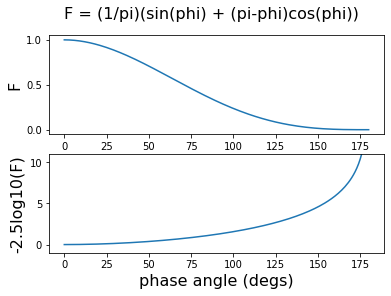

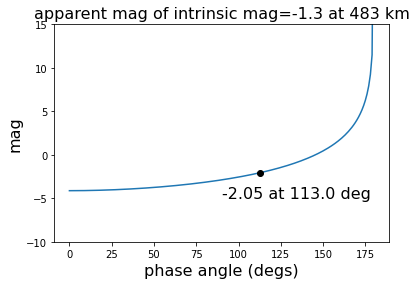

In [5]:
halfpi, pi, twopi = [f*np.pi for f in (0.5, 1, 2)]
degs, rads = 180/pi, pi/180

Mintrinsic   = -1.3
d_kilometers = 483.

phase_angles = np.linspace(0, pi, 181)

Mapp = Mapparent_from_Mintrinsic(Mintrinsic, d_kilometers, phase_angles)


if True:
    plt.figure()

    F = (1./pi)*(np.sin(phase_angles) + (pi-phase_angles)*np.cos(phase_angles))

    plt.suptitle('F = (1/pi)(sin(phi) + (pi-phi)cos(phi))', fontsize=16)

    plt.subplot(2, 1, 1)
    plt.plot(degs*phase_angles, F)
    plt.ylabel('F', fontsize=16)

    plt.subplot(2, 1, 2)
    plt.plot(degs*phase_angles, -2.5*np.log10(F))
    plt.xlabel('phase angle (degs)', fontsize=16)
    plt.ylabel('-2.5log10(F)', fontsize=16)
    plt.ylim(-1, 11)

    plt.show()

if True:
    plt.figure()
    plt.plot(degs*phase_angles, Mapp)
    plt.plot(degs*phase_angles[113], Mapp[113], 'ok')
    plt.text(90, -5, '{:0.2f} at {:0.1f} deg'.format(Mapp[113], 113), fontsize=16)
    plt.xlabel('phase angle (degs)', fontsize=16)
    plt.ylabel('mag', fontsize=16)
    plt.title('apparent mag of intrinsic mag=-1.3 at 483 km', fontsize=16)
    plt.ylim(-10, 15)
    plt.show()